# LES RESEAUX A CONVOLUTION


## C'est quoi un réseau a convolution ?


### Un réseau a convolution est un réseau très utilisé dans l'analyse et la classification d'image. Car il permet d'extraire des caractéristiques ce qu'est incapable de faire un réseau de neuronne classique.

### Pour ce faire il va prendre une image en entrée, appliquer une série de filtre, une phase de pooling.
### Refaire l'opération en fonction du nombre de couche de convolution
### Aplatir
### Envoyer le tout sur un réseau dense


<img src="images/cnn_1.png">

## Etape 1 l'image

Bon déjà on va essayer de se souvenir de comment une machine "voit" une image

<img src="images/cnn_cat.png">

En gros ca voit un tableau avec pleins de chiffres ...

## Etape 2 : les filtres

### les filtres vont parcourir nos images pour appliquer en appliquant un fonction transformant l'image et générant une feature map

<img src="images/cnn_f1.png">


## Exemple de filtre
<img src="images/cnn_f3.png">


<img src="images/filters.gif">

<img src="images/feature_map.png">

# Le pooling


Le pooling est une phase très importante dans notre réseau a convolution. Il permet de réduire la taille des images en ne gardant que les caractéristiques essentielles. Il existe plusieurs types de pooling, mais le plus utilisé reste le Max Pooling dont le principe s'illustre comme ceci

<img src="images/max_pool.png">

# L'applatissement


Comme en sortie de convolution l'on passe par un réseau de neuronne dense, il est impératif d'applatir nos images pour passer d'une matrice à un vecteur

<img src="images/cnn_flat.png">

# CONSTRUCTION


# Importer les librairies

In [37]:
import numpy as np
import tensorflow as tf
#Va nous permettre d'accèder a certains dataset
# ( https://keras.io/datasets/ )
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


# Importer le dataset

In [38]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [39]:
class_names = ['top','trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','	Ankle boot']

# Preprocessing

In [40]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train =  X_train.reshape(60000, 28, 28, 1)

In [41]:
X_train.shape

(60000, 28, 28, 1)

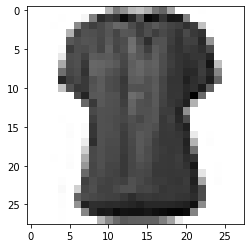

In [43]:
 plt.imshow(X_train[55].reshape((28, 28)), cmap=plt.cm.binary)

In [44]:
label_test = X_test
X_test =  X_test.reshape(10000, 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

# Construction de notre CNN


In [45]:
model = tf.keras.models.Sequential()

In [46]:
# Must define the input shape in the first layer of the neural network

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=3))


model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=3))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 16)          4624      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               37120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [48]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [49]:
model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.5780 - sparse_categorical_accuracy: 0.7882
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3775 - sparse_categorical_accuracy: 0.8634
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3306 - sparse_categorical_accuracy: 0.8789
Epoch 4/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3044 - sparse_categorical_accuracy: 0.8880
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2879 - sparse_categorical_accuracy: 0.8954
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2756 - sparse_categorical_accuracy: 0.8979
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2642 - sparse_categorical_accuracy: 0.9014
Epoch 8/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2571 - spars

In [50]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9039


# Visualiser

## Création d'un tableau contenant nos prédictions

In [51]:
prediction = model.predict(X_test)

## Création des fonctions de visualisation

In [52]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [53]:
(images_train, labels_train), (images_test, labels_test) = fashion_mnist.load_data()

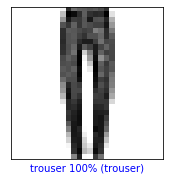

In [58]:
i = 897
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], labels_test, images_test)

plt.show()